The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\henry\OneDrive - Washington State University (email.wsu.edu)\WSU\EE-415\ee415-thames-shared\src\test


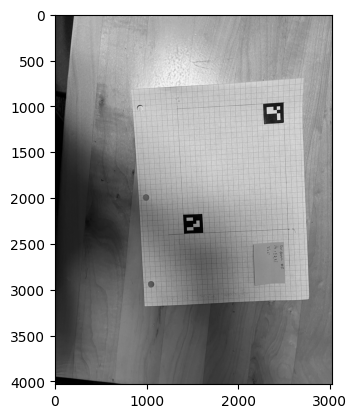

In [9]:
%load_ext autoreload
%autoreload 2

import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

print(os.getcwd())

img = cv.imread("../../images/marker-image-tests/testbench2-2.png")
if img is None:
    raise Exception("Image not found")
img.shape

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [2]:
detector_params = cv.aruco.DetectorParameters()
detector_dictionary = cv.aruco.getPredefinedDictionary(cv.aruco.DICT_4X4_50)
detector = cv.aruco.ArucoDetector()
corners, ids, rejected = detector.detectMarkers(img)

print("corner:", corners[0])
print("corner shape:", corners[0].shape)
print("ids shape:", ids.shape)
print("rejected shape:", rejected[0].shape)

corner: [[[2279. 1199.]
  [2269.  985.]
  [2480.  969.]
  [2481. 1180.]]]
corner shape: (1, 4, 2)
ids shape: (2, 1)
rejected shape: (1, 4, 2)


In [6]:
import sys
app_path = os.path.abspath("..")
print(app_path); sys.path = [p for p in sys.path if p != app_path] + [app_path]
print(sys.path)
from app import markers
result = markers.find_markers(img)
result


c:\Users\henry\OneDrive - Washington State University (email.wsu.edu)\WSU\EE-415\ee415-thames-shared\src
['c:\\Users\\henry\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'c:\\Users\\henry\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'c:\\Users\\henry\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'c:\\Users\\henry\\AppData\\Local\\Programs\\Python\\Python313', '', 'c:\\Users\\henry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages', 'c:\\Users\\henry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\win32', 'c:\\Users\\henry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\henry\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\henry\\OneDrive - Washington State University (email.wsu.edu)\\WSU\\EE-415\\ee415-thames-shared\\src']


In [4]:
result.m_corners

(array([[[2279., 1199.],
         [2269.,  985.],
         [2480.,  969.],
         [2481., 1180.]]], dtype=float32),
 array([[[1410., 2390.],
         [1398., 2192.],
         [1596., 2184.],
         [1607., 2379.]]], dtype=float32))

[[2269  969]
 [ 212    0]
 [   0  230]
 [2481 1199]]
(4, 2)


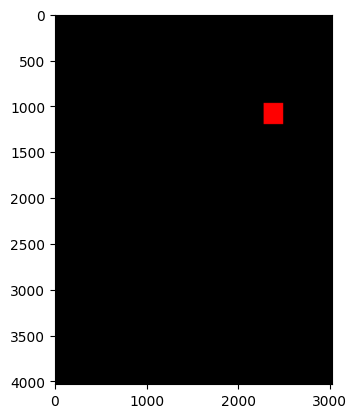

In [ ]:
parallelogram = result.get_roi_parrallelogram()
print(parallelogram)
print(parallelogram.shape)
mask = result.get_roi_mask(parallelogram)
mask = mask * 255

plt.imshow(mask, cmap='gray')